IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M3\FAULT_M3_5


VOLO m3 FAULT 5%

In [3]:
rcou_m3_fault5 = pd.read_csv("RCOU.csv")
rcou_m3_fault5 = rcou_m3_fault5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m3_fault5 = rcou_m3_fault5[((rcou_m3_fault5['C9'] >= 1400) & (rcou_m3_fault5['C10'] >= 1400) & (rcou_m3_fault5['C11'] >= 1400) & (rcou_m3_fault5['C12'] >= 1400) & (rcou_m3_fault5['C13'] >= 1400) & (rcou_m3_fault5['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m3_fault5)

,TimeUS,C9,C10,C11,C12,C13,C14
5504,204233384,1471,1448,1448,1471,1457,1462
5505,204243252,1509,1450,1435,1522,1463,1497
5506,204253956,1553,1443,1490,1510,1541,1457
5507,204264271,1576,1457,1531,1508,1584,1448
5508,204274574,1548,1529,1564,1511,1570,1505
...,...,...,...,...,...,...,...
14584,303963817,1542,1430,1547,1423,1448,1526
14585,303977348,1543,1424,1524,1447,1425,1542
14586,303987906,1536,1428,1542,1421,1443,1524
14587,303999574,1533,1428,1529,1433,1427,1534


In [4]:
xkf1_m3_fault5 = pd.read_csv("XKF1_0.csv")
xkf1_m3_fault5 = xkf1_m3_fault5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m3_fault5 = xkf1_m3_fault5[((xkf1_m3_fault5['TimeUS'] >= 204233384) & (xkf1_m3_fault5['TimeUS'] <= 304010535))]
print(xkf1_m3_fault5)

          TimeUS  Roll  Pitch   Yaw
5507   204241781  0.94  -0.72  2.56
5508   204251811  1.02  -0.76  2.56
5509   204262143  1.07  -0.79  2.57
5510   204272724  1.05  -0.79  2.57
5511   204282473  0.96  -0.79  2.58
...          ...   ...    ...   ...
14587  303961797  1.11  -0.33  2.08
14588  303975700  1.09  -0.33  2.04
14589  303985816  1.10  -0.30  2.01
14590  303997185  1.06  -0.25  2.00
14591  304007782  0.97  -0.22  1.97

[9085 rows x 4 columns]


In [5]:
att_m3_fault5 = pd.read_csv("ATT.csv")
att_m3_fault5 = att_m3_fault5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m3_fault5 = att_m3_fault5[((att_m3_fault5['TimeUS'] >= 204233384) & (att_m3_fault5['TimeUS'] <= 304010535))]
print(att_m3_fault5)

          TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw
5510   204242578     0.00  0.94      0.00  -0.72    2.49  2.56
5511   204253192     0.00  1.02      0.00  -0.76    2.49  2.56
5512   204263435     0.00  1.07      0.00  -0.79    2.49  2.57
5513   204273819     0.00  1.05      0.00  -0.79    2.49  2.57
5514   204283829     0.00  0.96      0.00  -0.79    2.49  2.58
...          ...      ...   ...       ...    ...     ...   ...
14591  303963074     2.75  1.11      1.42  -0.33    1.70  2.08
14592  303976765     2.72  1.09      1.45  -0.33    1.70  2.04
14593  303987111     2.69  1.10      1.47  -0.30    1.71  2.01
14594  303998743     2.66  1.06      1.49  -0.25    1.71  2.00
14595  304009828     2.65  0.97      1.52  -0.22    1.71  1.97

[9086 rows x 7 columns]


In [6]:
att_m3_fault5 = pd.merge_asof(att_m3_fault5,xkf1_m3_fault5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m3_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw
0     204242578     0.00  0.94      0.00  -0.72    2.49  2.56
1     204253192     0.00  1.02      0.00  -0.76    2.49  2.56
2     204263435     0.00  1.07      0.00  -0.79    2.49  2.57
3     204273819     0.00  1.05      0.00  -0.79    2.49  2.57
4     204283829     0.00  0.96      0.00  -0.79    2.49  2.58
...         ...      ...   ...       ...    ...     ...   ...
9081  303963074     2.75  1.11      1.42  -0.33    1.70  2.08
9082  303976765     2.72  1.09      1.45  -0.33    1.70  2.04
9083  303987111     2.69  1.10      1.47  -0.30    1.71  2.01
9084  303998743     2.66  1.06      1.49  -0.25    1.71  2.00
9085  304009828     2.65  0.97      1.52  -0.22    1.71  1.97

[9086 rows x 7 columns]


In [7]:
esc_2_m3_fault5 = pd.read_csv("ESC_2.csv")
esc_2_m3_fault5 = esc_2_m3_fault5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_2_m3_fault5 = esc_2_m3_fault5[((esc_2_m3_fault5['TimeUS'] >= 204233384) & (esc_2_m3_fault5['TimeUS'] <= 304010535))]
print(esc_2_m3_fault5)

         TimeUS   RPM  Curr
507   204276939  2401  4.54
508   204384152  4503  4.54
509   204497138  5906  4.20
510   204598643  6147  4.61
511   204707694  6410  3.81
...         ...   ...   ...
1359  303567469  5832  2.93
1360  303679561  5624  3.14
1361  303778325  5700  3.28
1362  303890871  5739  2.96
1363  303999709  5708  2.83

[857 rows x 3 columns]


In [8]:
imu_2_m3_fault5 = pd.read_csv("IMU_2.csv")
imu_2_m3_fault5 = imu_2_m3_fault5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m3_fault5 = imu_2_m3_fault5[((imu_2_m3_fault5['TimeUS'] >= 204233384) & (imu_2_m3_fault5['TimeUS'] <= 304010535))]
print(imu_2_m3_fault5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
21789  204234753 -0.024575 -0.024283 -0.001101 -0.198312  0.148841  -9.671492
21790  204237295  0.005727 -0.027544 -0.010038 -0.230843  0.202286  -9.657310
21791  204240279  0.071114  0.037119  0.005892 -0.308254  0.197127  -9.940502
21792  204242197  0.023852  0.135248  0.029906 -0.393868  0.154902 -10.320090
21793  204245972 -0.020405  0.081297  0.031451 -0.418631  0.126494 -10.244170
...          ...       ...       ...       ...       ...       ...        ...
56271  303998639 -0.058452  0.078847 -0.044663  0.056585 -0.458672 -10.058490
56272  304001303 -0.097566  0.023808 -0.050574  0.067066 -0.490258 -10.065910
56273  304004042 -0.120193  0.016187 -0.048743  0.042913 -0.459213 -10.090180
56274  304006784 -0.111955  0.071452 -0.043737  0.077529 -0.382426 -10.049370
56275  304009580 -0.093100  0.077378 -0.042245  0.127937 -0.284427  -9.989185

[34487 rows x 7 columns]


In [9]:
m3_fault5 = pd.merge_asof(att_m3_fault5, imu_2_m3_fault5, on="TimeUS",  tolerance= 100000)
print(m3_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw      GyrX  \
0     204242578     0.00  0.94      0.00  -0.72    2.49  2.56  0.023852   
1     204253192     0.00  1.02      0.00  -0.76    2.49  2.56  0.102127   
2     204263435     0.00  1.07      0.00  -0.79    2.49  2.57  0.121545   
3     204273819     0.00  1.05      0.00  -0.79    2.49  2.57  0.132153   
4     204283829     0.00  0.96      0.00  -0.79    2.49  2.58 -0.017601   
...         ...      ...   ...       ...    ...     ...   ...       ...   
9081  303963074     2.75  1.11      1.42  -0.33    1.70  2.08 -0.061763   
9082  303976765     2.72  1.09      1.45  -0.33    1.70  2.04 -0.008820   
9083  303987111     2.69  1.10      1.47  -0.30    1.71  2.01 -0.012648   
9084  303998743     2.66  1.06      1.49  -0.25    1.71  2.00 -0.058452   
9085  304009828     2.65  0.97      1.52  -0.22    1.71  1.97 -0.093100   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.135248  0.029906 -0.393868  0.154

In [10]:
m3_fault5 = pd.merge_asof(esc_2_m3_fault5, m3_fault5, on="TimeUS",  tolerance= 100000)
print(m3_fault5)

        TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw  \
0    204276939  2401  4.54     0.00  1.05      0.00  -0.79    2.49  2.57   
1    204384152  4503  4.54     0.00  1.45      0.00  -0.55    2.49  2.81   
2    204497138  5906  4.20     0.00  2.39      0.00   0.18    2.49  3.75   
3    204598643  6147  4.61     0.00  2.78      0.00   0.69    2.49  5.05   
4    204707694  6410  3.81     0.00  2.74      0.00   0.69    2.49  6.77   
..         ...   ...   ...      ...   ...       ...    ...     ...   ...   
852  303567469  5832  2.93     3.99  0.87      1.00   0.92    1.68  1.64   
853  303679561  5624  3.14     4.10  2.05      1.02   0.28    1.68  2.07   
854  303778325  5700  3.28     3.73  2.17      1.04  -0.25    1.68  2.24   
855  303890871  5739  2.96     3.08  1.49      1.21  -0.43    1.69  2.19   
856  303999709  5708  2.83     2.66  1.06      1.49  -0.25    1.71  2.00   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  
0    0.132153 -0.103

In [11]:
m3_fault5["TimeUS"] = m3_fault5["TimeUS"] - m3_fault5.iloc[0]["TimeUS"]
m3_fault5["TimeUS"] = m3_fault5["TimeUS"].astype(int)
m3_fault5["Guasto"] = 1
print(m3_fault5)

       TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw   Yaw  \
0           0  2401  4.54     0.00  1.05      0.00  -0.79    2.49  2.57   
1      107213  4503  4.54     0.00  1.45      0.00  -0.55    2.49  2.81   
2      220199  5906  4.20     0.00  2.39      0.00   0.18    2.49  3.75   
3      321704  6147  4.61     0.00  2.78      0.00   0.69    2.49  5.05   
4      430755  6410  3.81     0.00  2.74      0.00   0.69    2.49  6.77   
..        ...   ...   ...      ...   ...       ...    ...     ...   ...   
852  99290530  5832  2.93     3.99  0.87      1.00   0.92    1.68  1.64   
853  99402622  5624  3.14     4.10  2.05      1.02   0.28    1.68  2.07   
854  99501386  5700  3.28     3.73  2.17      1.04  -0.25    1.68  2.24   
855  99613932  5739  2.96     3.08  1.49      1.21  -0.43    1.69  2.19   
856  99722770  5708  2.83     2.66  1.06      1.49  -0.25    1.71  2.00   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  
0    0.132153 -0.103850 

In [12]:
path_file = path_file.replace(r"M3\FAULT_M3_5", "")
os.chdir(path_file)
m3_fault5.to_csv('m3_fault5.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


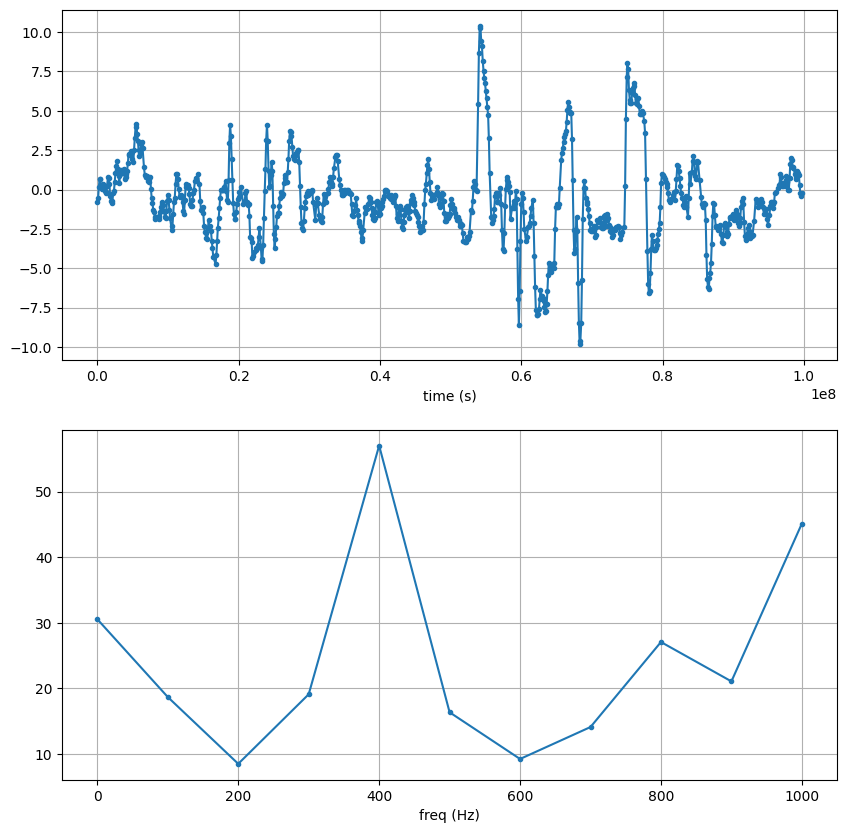

In [13]:
t = m3_fault5["TimeUS"]
y = m3_fault5["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

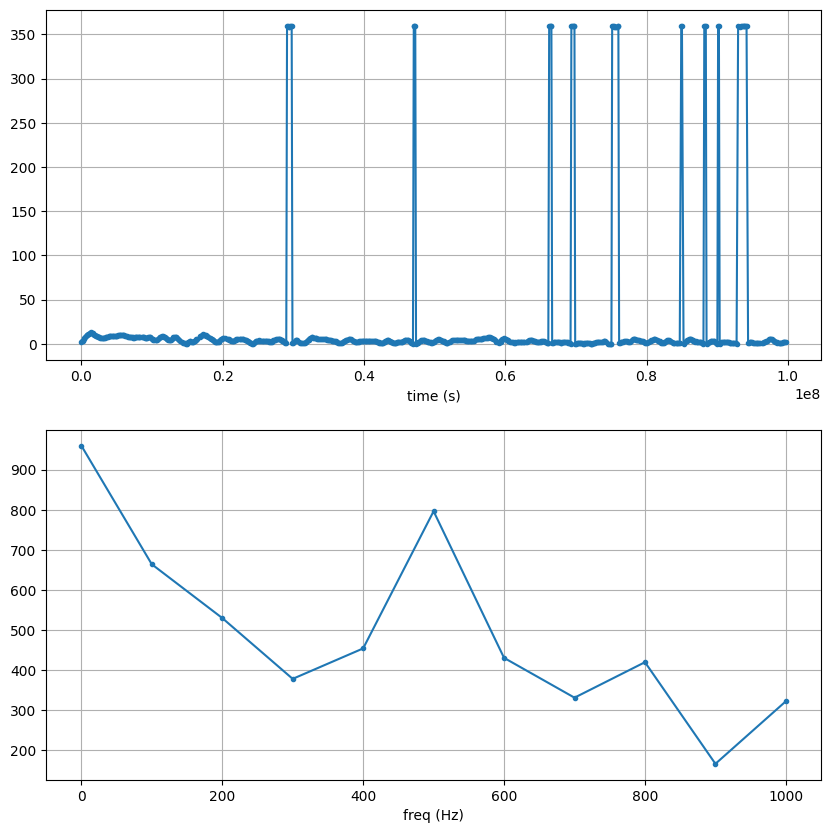

In [14]:
t = m3_fault5["TimeUS"]
y = m3_fault5["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

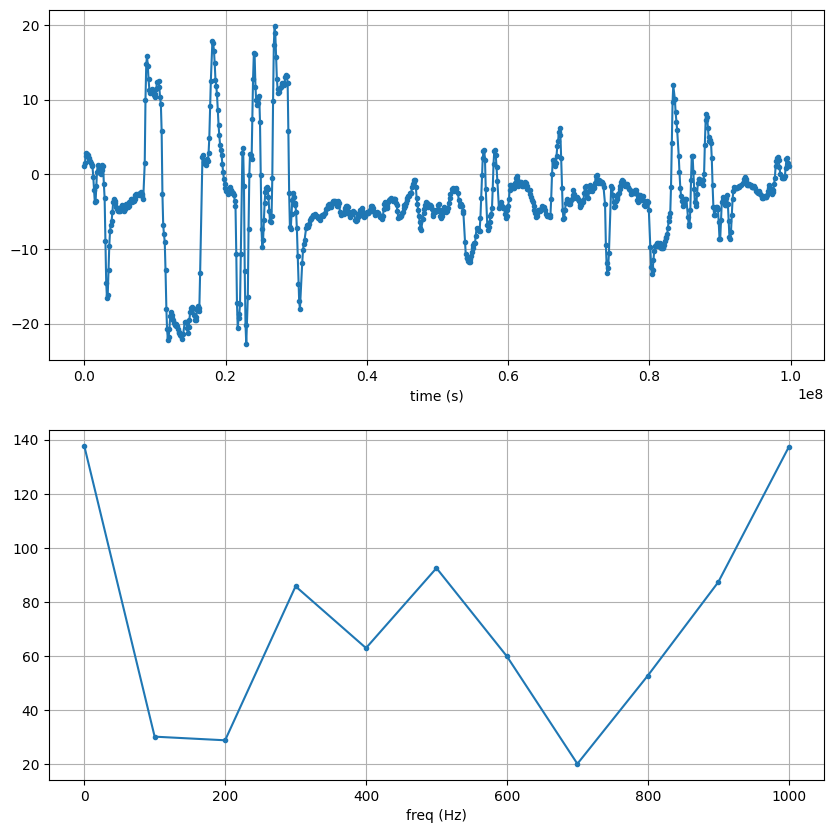

In [15]:
t = m3_fault5["TimeUS"]
y = m3_fault5["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

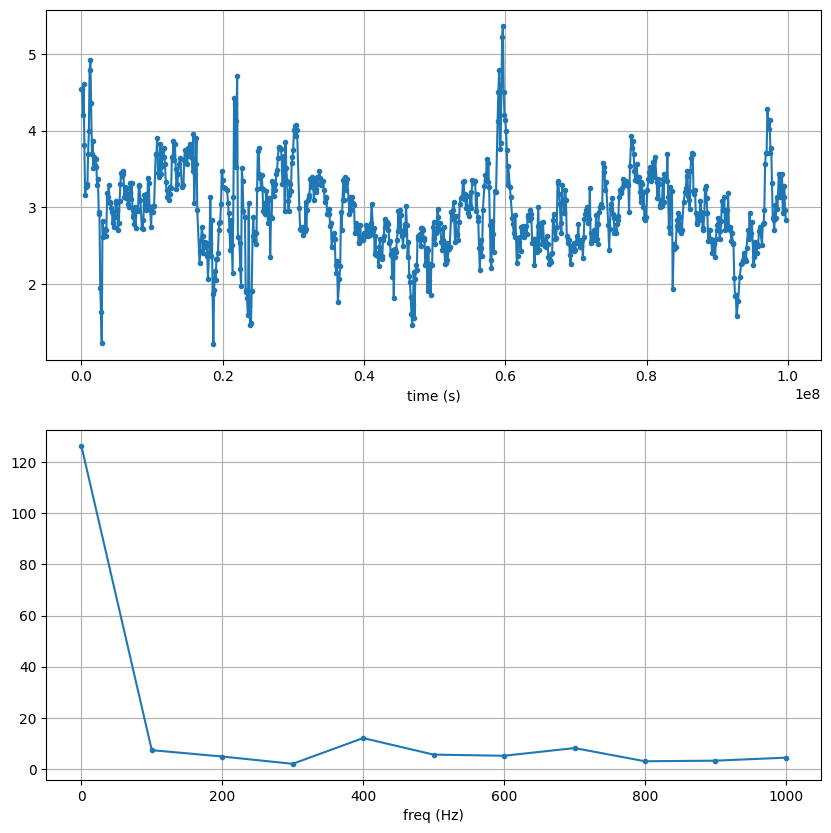

In [16]:
t = m3_fault5["TimeUS"]
y = m3_fault5["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

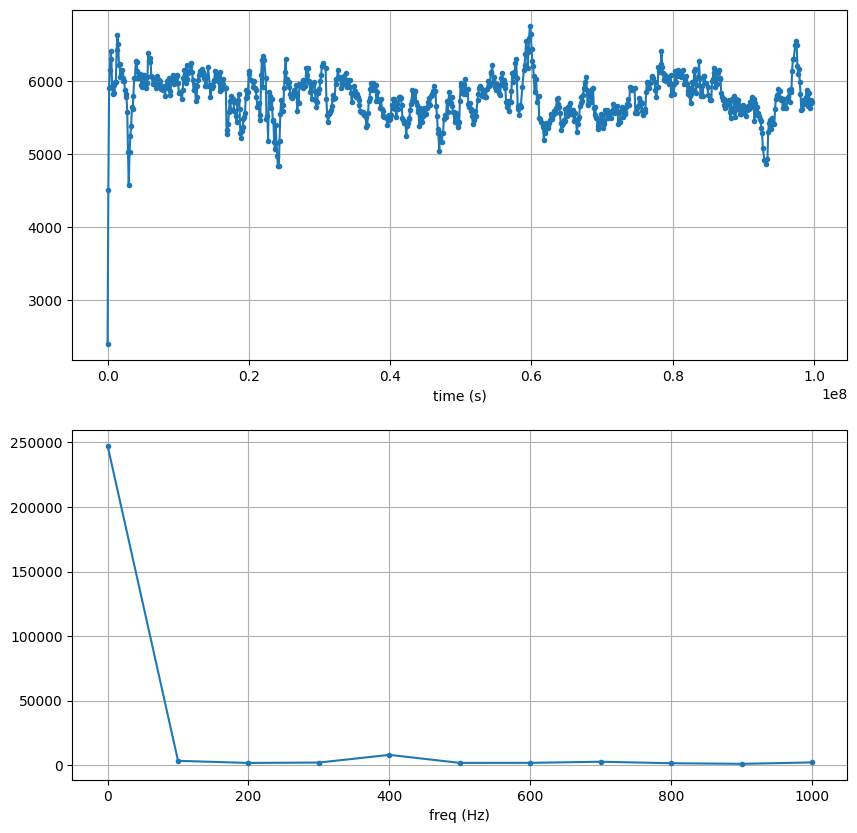

In [17]:
t = m3_fault5["TimeUS"]
y = m3_fault5["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

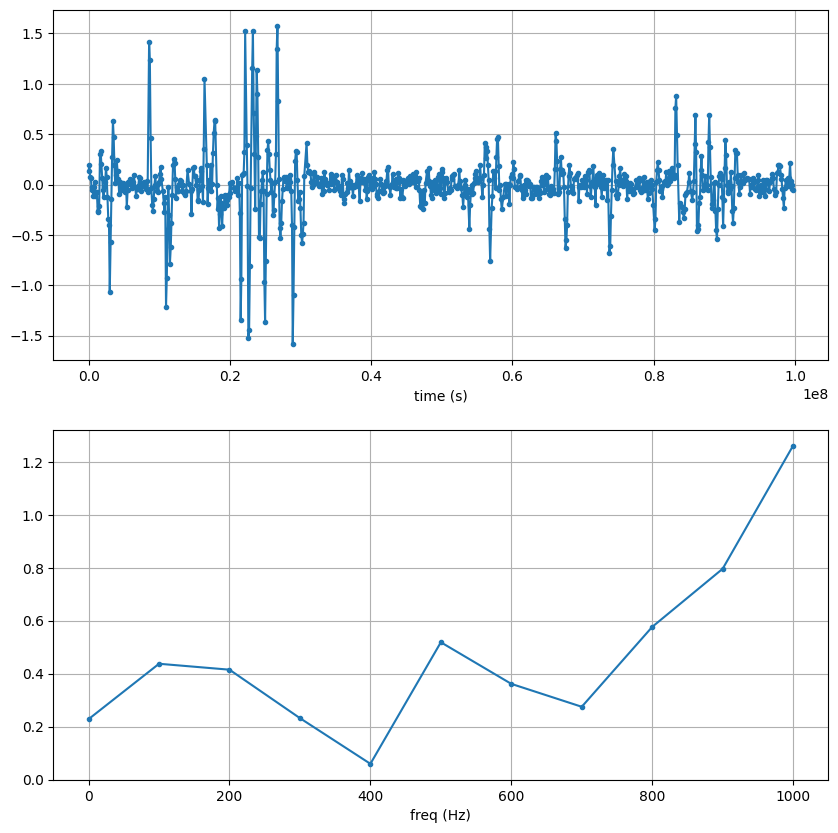

In [18]:
t = m3_fault5["TimeUS"]
y = m3_fault5["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

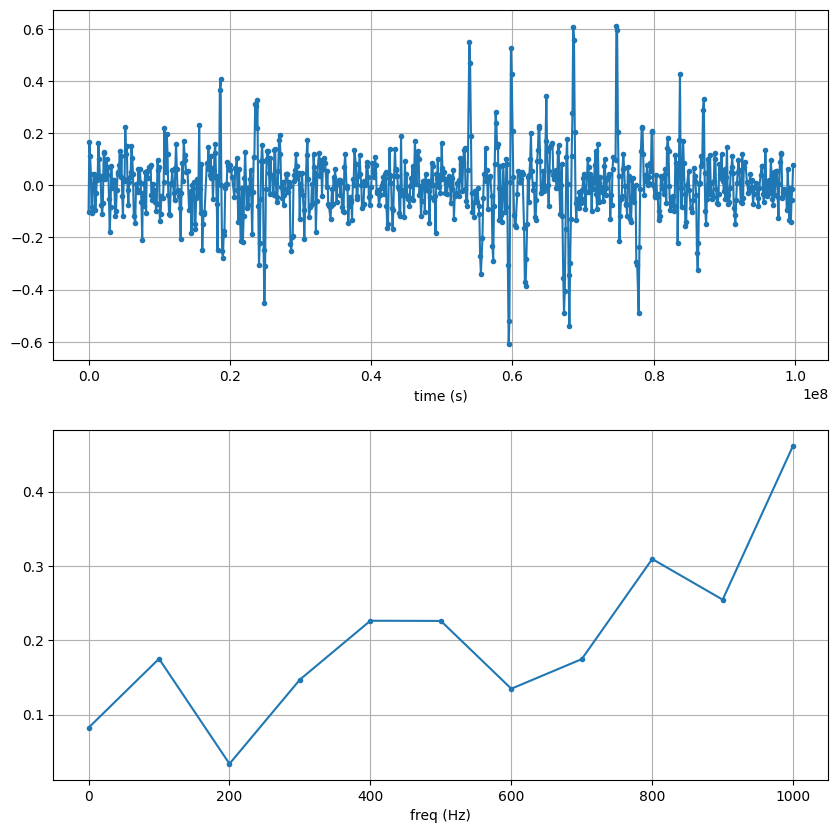

In [19]:
t = m3_fault5["TimeUS"]
y = m3_fault5["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

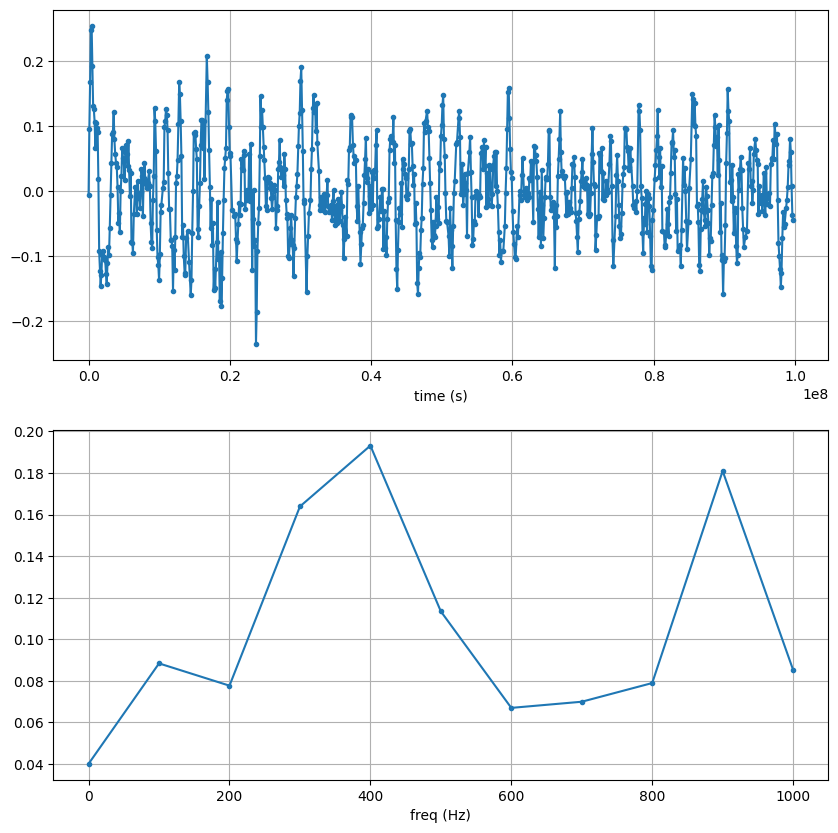

In [20]:
t = m3_fault5["TimeUS"]
y = m3_fault5["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

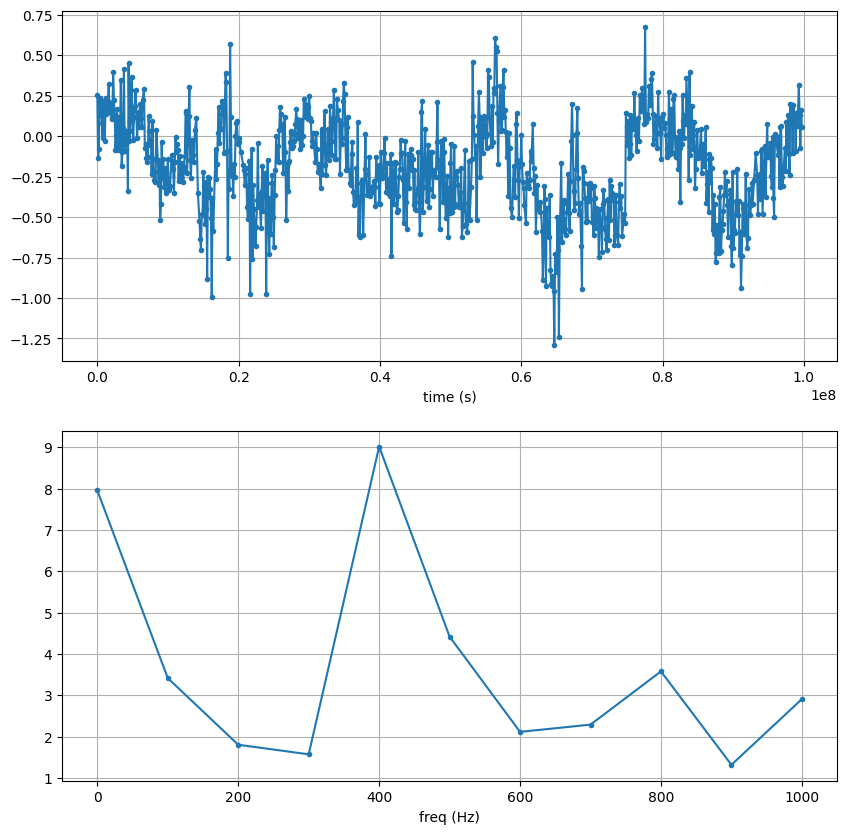

In [21]:
t = m3_fault5["TimeUS"]
y = m3_fault5["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

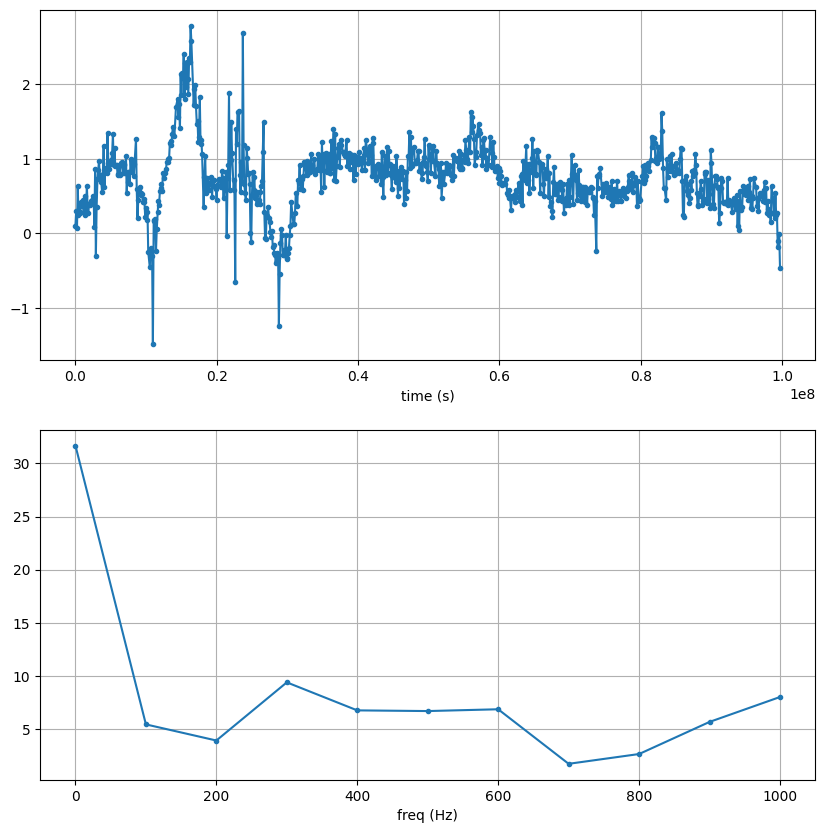

In [22]:
t = m3_fault5["TimeUS"]
y = m3_fault5["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

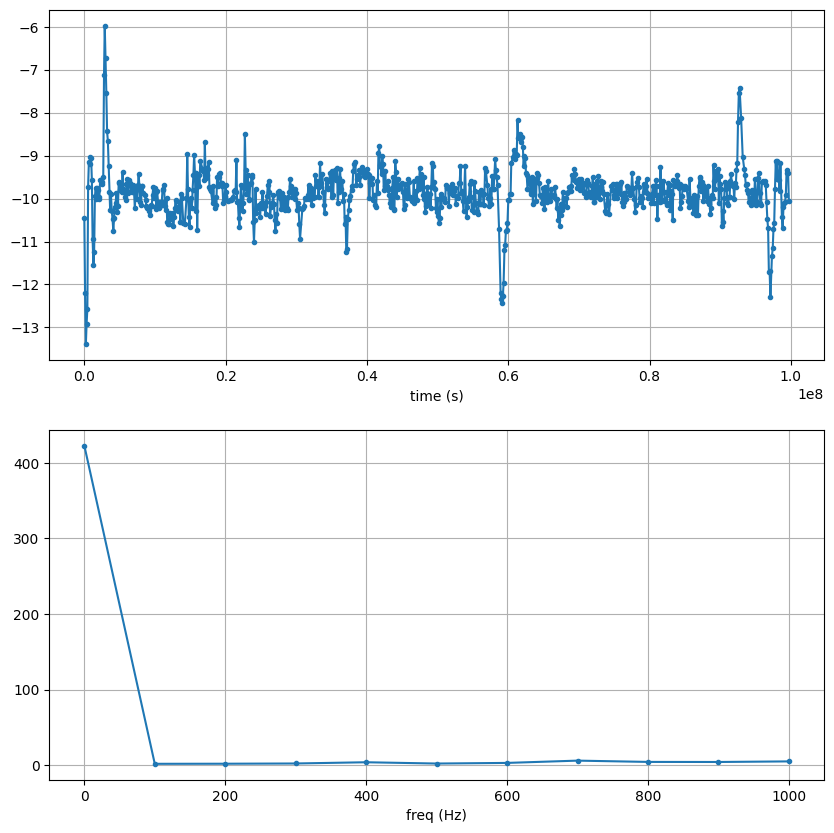

In [23]:
t = m3_fault5["TimeUS"]
y = m3_fault5["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()